Populating the interactive namespace from numpy and matplotlib
iteration: 0 
iteration: 250 
iteration: 500 
iteration: 750 
iteration: 1000 
iteration: 1250 
prediction for x1 = 1, x2 = 0, x3 = 0, is [0.10677972]
ground truth for x1 = 1, x2 = 0, x3 = 0 is 0
absolute error for the prediction [0.10677972]


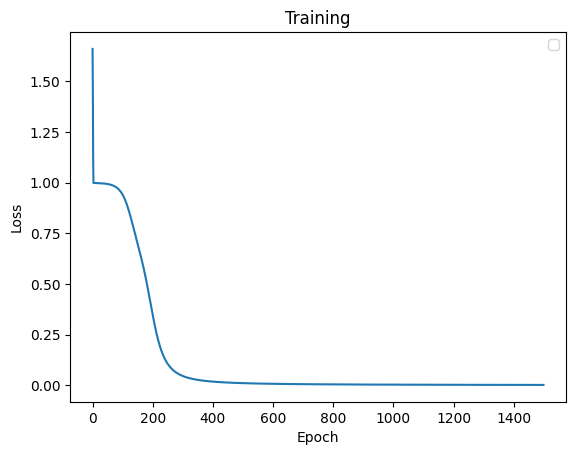

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def myPlot(x):
    plot(x)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training")
    plt.legend()


#Data
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

def sigmoid(t):
  return 1/(1+np.exp(-t))

def dsigmoid(p):
  return p * (1 - p)

layers = dict()
weights = dict()
output = dict()

hidden_layer_size = 5

weights[1] = np.random.rand(X.shape[1],hidden_layer_size)
weights[2] = np.random.rand(hidden_layer_size,1)
output[1] = np. zeros(y.shape)

loss_hist =[]

def feedforward():
    layers[1] = sigmoid(np.dot(X, weights[1]))
    layers[2] = sigmoid(np.dot(layers[1], weights[2]))
    return layers[2]

def partials():
    d_weights2 = np.dot(layers[1].T, 2*(y -output[1])*dsigmoid(output[1]))
    d_weights1 = np.dot(X.T, np.dot(2*(y -output[1])*dsigmoid(output[1]), weights[2].T)*dsigmoid(layers[1]))
    return d_weights1, d_weights2

def fp(x):
    l1 = sigmoid(np.dot(x, weights[1]))
    l2 = sigmoid(np.dot(l1, weights[2]))
    return l2

def train_step(X, y):
    lr = 1.0
    output[1] = feedforward()
    dw1, dw2 = partials()
    weights[1] += dw1*lr
    weights[2] += dw2*lr

for i in range(1500):
    loss = np.sum(np.square(y - feedforward()))
    if i % 250==0:
       print("iteration: {} ".format(i))
        #print ("output:\n {}".format(feedforward()))

        #print ("loss: {} \n".format(loss))
        #print("chris: {}".format(layers[1]))
    loss_hist.append(loss)
    train_step(X, y)

#print(weights[1])
myPlot(loss_hist)
print("prediction for x1 = 1, x2 = 0, x3 = 0, is", fp([1,0,0]))
print("ground truth for x1 = 1, x2 = 0, x3 = 0 is", 0)
print("absolute error for the prediction", np.abs(0-fp([1,0,0])))